In [78]:
# using Pkg
# Pkg.add("https://github.com/MasanoriKanamaru/Astroshaper")
# Pkg.update("Astroshaper")

In [8]:
# Pkg.test("Astroshaper")

In [1]:
using Revise
using Astroshaper

In [4]:
using Plots
using DataFrames

In [6]:
using BenchmarkTools
using StaticArrays
using StructArrays
using LinearAlgebra

# 軌道計算の精度評価
## Kokubo & Makino (2004) と比較

In [263]:
a = 1.
e = 0.1
I = 0.
ω = Float64(π)
Ω = 0.
tₚ = Float64(π)  # denoted as T in Kokubo & Makino (2004)

μ = 1.
n = √(μ / a^3)
T = 2π / n
M = - n * tₚ

r₀ = [a*(1+e), 0, 0]             # Position at the perihelion
v₀ = [0, a*n*√((1-e)/(1+e)), 0]  # Velocity at the perihelion

@show r₀;
@show v₀;

r₀ = [1.1, 0.0, 0.0]
v₀ = [0.0, 0.9045340337332909, 0.0]


In [264]:
p1 = HermiteParticle(zeros(3), zeros(3), μ/G)
p2 = HermiteParticle(copy(r₀), copy(v₀), 0.)

ps = setParticles(p1, p2);

In [265]:
params_nbody = (
    ϵ = 0.,
    α = 7/6,
    Δt = 2^-5,
    t_end = 20π,
    save_interval = 5,
)

(ϵ = 0.0, α = 1.1666666666666667, Δt = 0.03125, t_end = 62.83185307179586, save_interval = 5)

In [266]:
@time run_Hermite4(ps, params_nbody, "tmp.txt");
# @benchmark run_Hermite4(ps, params_nbody, "tmp.txt")

# Δt = 0.03125
# t_end = 62.83185307179586
# 0.001480 seconds (314 allocations: 10.203 KiB) No output

Δt = 0.03125
t_end = 62.83185307179586
2011
E₀ = 0.0
E₁ = 0.0
ΔE = NaN
  0.005128 seconds (19.66 k allocations: 2.648 MiB)


In [267]:
ts, snapshots = load_snapshot("tmp.txt");

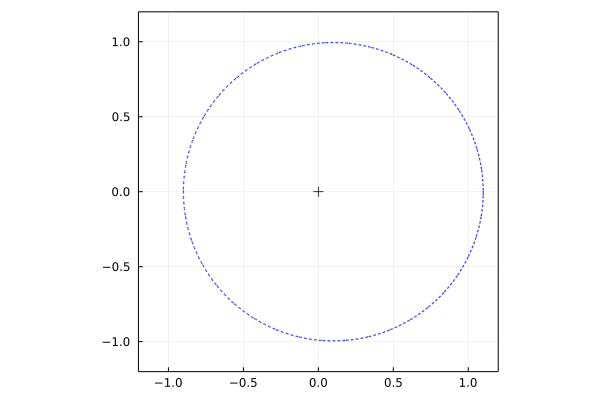

In [268]:
xs = [ps[2].r[1] for ps in snapshots]
ys = [ps[2].r[2] for ps in snapshots]

plot(framestyle=:box, legend=false)
plot!(aspect_ratio=:equal)
plot!(xlims=(-1.2, 1.2))
plot!(ylims=(-1.2, 1.2))
plot!([0], [0], marker=(:plus, 5, :black))
scatter!(xs, ys, marker=(:circle, 0.8, 1, :blue, stroke(0, 0.2, :black, :dot)))

In [269]:
df = DataFrame(t=Float64[], a=Float64[], e=Float64[], ω=Float64[], tₚ=Float64[])

for (t, ps) in zip(ts, snapshots)
    setOrigin2BaryCenter!(ps)
    μ = 1.  # G * sum(ps.m)
    r = ps[2].r
    v = ps[2].v

    elms = OrbitalElements(r, v, μ, t)
    push!(df, [t, elms.a, elms.e, elms.ω, elms.tₚ])
end

df.Δa = df.a .- df.a[1]
df.Δe = df.e .- df.e[1]
df.Δω = df.ω .- df.ω[1]
df.Δtₚ = df.tₚ .- df.tₚ[1];

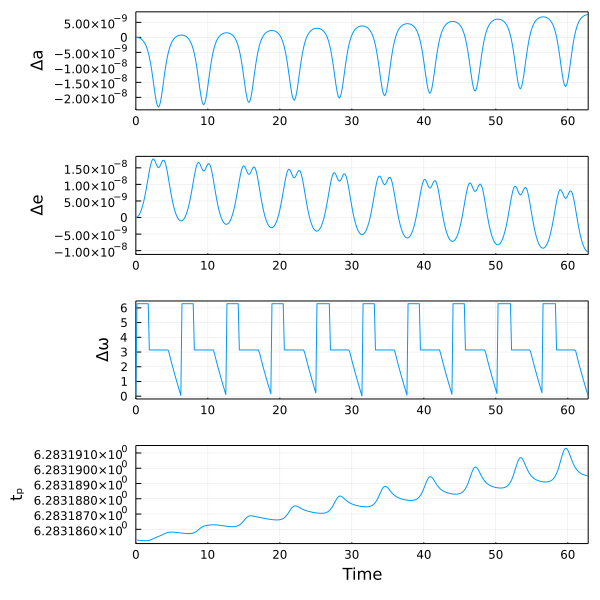

In [272]:
p1 = plot(df.t, df.Δa, legend=false, ylabel="Δa")
p2 = plot(df.t, df.Δe, legend=false, ylabel="Δe")
p3 = plot(df.t, df.Δω, legend=false, ylabel="Δω")
p4 = plot(df.t[2:end], df.Δtₚ[2:end], legend=false, ylabel="tₚ", xlabel="Time")

plot(p1, p2, p3, p4, layout=(4,1))
plot!(framestyle=:box, size=(600,600))
plot!(xlims=(0, 20π))

In [26]:
# range_xy = 1.3

# anim = @animate for (t, ps) in zip(ts, snapshots)
#     r1 = ps[1].r
#     r2 = ps[2].r

#     plt = plot(framestyle=:box, legend=false, aspect_ratio=:equal, bg=:black,
#         title="t = $(lpad(round(t/3600/24), 5)) [day]",
#         xlims=(-range_xy, range_xy), xlabel="X [AU]",
#         ylims=(-range_xy, range_xy), ylabel="Y [AU]",
#     )
    
#     scatter!([r1[1]], [r1[2]], marker=())
#     scatter!([r2[1]], [r2[2]], marker=())
# end

In [27]:
# gif(anim, "./tmp.gif", fps=20)

In [17]:
# a = 1.
# e = 0.1
# I = 0.
# ω = Float64(π)
# Ω = 0.
# tₚ = Float64(π)

# μ = 1.
# n = √(μ / a^3)
# T = 2π / n
# M = - n * tₚ

# elms_init = OrbitalElements(a, e, I, ω, Ω, M, tₚ, μ, n, T);

In [18]:
# @show a
# @show e
# @show ω
# @show tₚ  # denoted as T in Kokubo & Makino (2004)

# @show T
# @show n
# @show μ;

In [19]:
# t = 0
# E = Astroshaper.solveKeplerEquation2(elms_init, t)
# r, v = Astroshaper.get_rv(elms_init, E)
# R = orb_to_ref(r, elms_init)  # r₀ = a * (1+e)
# V = orb_to_ref(v, elms_init)  # v₀ = a * n * √((1-e)/(1+e))

# @show R;
# @show V;
# elms = OrbitalElements(R, V, elms_init.μ, t);

In [ ]:
# p1 = HermiteParticle(zeros(3), zeros(3), μ/G)
# p2 = HermiteParticle(collect(R), collect(V), 0.)

# ps = setParticles(p1, p2);

# 4th-degree Hermite

参考：https://github.com/nitadori/Hermite/blob/master/SRC/hermite4-k.cpp

In [101]:
Sun = HermiteParticle(zeros(3), zeros(3), M☉, 1.)
Earth = HermiteParticle([AU, 0, 0], [0, 3.0e4, 0], M_Earth, 1.)
μ = GM☉ + GM_Earth

ps = setParticles(Sun, Earth);

In [102]:
params_sim = (
    ϵ = 0.1,
    α = 7/6,
    η = 0.05,
    Δt = 3600*24*365/400,
    t_end = 3600*24*365*100,
    save_interval = 30,
)

(ϵ = 0.1, α = 1.1666666666666667, η = 0.05, Δt = 78840.0, t_end = 3153600000, save_interval = 30)

In [103]:
@time run_Hermite4(ps, params_sim, "tmp.txt");

# Δt = 78840.0
# t_end = 63072000
# 801 timesteps (27 to be saved)
#   0.002543 seconds (33.06 k allocations: 1.230 MiB)

Δt = 78840.0
t_end = 3153600000
40001
E₀ = -2.610686144540983e33
E₁ = -2.610686138617619e33
ΔE = -2.268891743323403e-9
  0.031374 seconds (64.64 k allocations: 8.771 MiB)


In [104]:
ts, snapshots = load_snapshot("tmp.txt");

In [105]:
# setOrigin2BaryCenter!(ps, rs, vs, as)

In [106]:
# range_xy = 1.3

# anim = @animate for (t, ps) in zip(ts, snapshots)
#     r1 = ps[1].r / AU
#     r2 = ps[2].r / AU

#     plt = plot(framestyle=:box, legend=false, aspect_ratio=:equal, bg=:black,
#         title="t = $(lpad(round(t/3600/24), 5)) [day]",
#         xlims=(-range_xy, range_xy), xlabel="X [AU]",
#         ylims=(-range_xy, range_xy), ylabel="Y [AU]",
#     )
    
#     scatter!([r1[1]], [r1[2]], marker=())
#     scatter!([r2[1]], [r2[2]], marker=())
# end

In [107]:
# gif(anim, "./tmp.gif", fps=20)

In [8]:
xs = [ps[2].r[1] for ps in snapshots] / AU
ys = [ps[2].r[2] for ps in snapshots] / AU

plot(framestyle=:box, legend=false)
plot!(aspect_ratio=:equal)
plot!(xlims=(-1.2, 1.2))
plot!(ylims=(-1.2, 1.2))
plot!([0], [0], marker=(:plus, 5, :black))
scatter!(xs, ys, marker=(:circle, 0.5, 1, :blue, stroke(0, 0.2, :black, :dot)))

In [109]:
as = []
es = []
for ps in snapshots
    r = norm(ps[2].r - ps[1].r)
    v = norm(ps[2].v - ps[1].v)
    
    a = (2/r - v^2/μ)^-1
    e = √(1 - norm((ps[2].r - ps[1].r) × (ps[2].v - ps[1].v))^2/(μ*a))
    push!(as, a)
    push!(es, e)
end
Δas = as .- as[1];
Δes = es .- es[1];

In [7]:
plot(ts, Δas/as[1])

In [4]:
plot(ts, Δes/es[1], xlims=(0,1e9))

# Euler法

In [7]:
# Sun = Particle(zeros(3), zeros(3), M☉, 1.)
# Earth = Particle([AU, 0., 0.], [0., 3.0e4, 0.], 5.972e24, 1.)

# ps = setParticles(Sun, Earth);

In [8]:
# params_sim = (
#     ϵ = 0.1,
#     Δt = 3600*24*365/400,
#     t_end = 3600*24*365*2,
#     save_interval = 10,
# )

In [9]:
# @time ts, rs, vs, as = run_Euler(ps, params_sim);

In [10]:
# setOrigin2BaryCenter!(ps, rs, vs, as)

In [11]:
# range_xy = 1.2
# # range_xy = 1e7 / AU

# anim = @animate for (i, t) in enumerate(ts)
#     r1 = rs[i,:,1] / AU
#     r2 = rs[i,:,2] / AU

#     plt = plot(framestyle=:box, legend=false, aspect_ratio=:equal, bg=:black,
#         title="t = $(lpad(round(t/3600/24), 5)) [day]",
#         xlims=(-range_xy, range_xy), xlabel="X [AU]",
#         ylims=(-range_xy, range_xy), ylabel="Y [AU]",
#     )
    
#     scatter!([r1[1]], [r1[2]], marker=())
#     scatter!([r2[1]], [r2[2]], marker=())
# end

In [12]:
# gif(anim, "./tmp.gif", fps=20)

In [13]:
# xs = rs[:, 1, 2]
# ys = rs[:, 2, 2]

# plot(framestyle=:box, legend=false)
# plot!(aspect_ratio=:equal)
# plot!(xlims=(-1.2, 1.2))
# plot!(ylims=(-1.2, 1.2))
# plot!([0], [0], marker=(:plus, 5, :black))
# plot!(xs./AU, ys./AU, marker=(:circle, 1, 0.5, :blue, stroke(0, 0.2, :black, :dot)))

# 4th-degree Runge Kutta

https://perso.crans.org/besson/publis/notebooks/Runge-Kutta_methods_for_ODE_integration_in_Julia.html#Runge-Kutta-method-of-order-4,-"RK4"

https://github.com/timothyrenner/RungeKutta.jl/blob/master/src/RungeKutta.jl

https://qiita.com/guraragu0010/items/5e202b1e84170d8c1057

https://qiita.com/guraragu0010/items/b97ea313ed1ec0cbea61

https://qiita.com/guraragu0010/items/5e202b1e84170d8c1057

https://qiita.com/kaityo256/items/e3428deb394b3ad1e739

http://www.cas.cmc.osaka-u.ac.jp/~paoon/Lectures/2020-8Semester-NA-basic/09-second-derivative/

In [14]:
# Sun = Particle(zeros(3), zeros(3), M☉, 1.)
# Earth = Particle([AU, 0., 0.], [0., 3.0e4, 0.], 5.972e24, 1.)

# ps = setParticles(Sun, Earth);

In [15]:
# params_sim = (
#     ϵ = 0.1,
#     η = 0.05,
#     Δt = 3600*24*365/400,
#     t_end = 3600*24*365*2,
#     save_interval = 20,
# )

In [16]:
# @time　times, snapshots = run_RungeKutta(ps, params_sim);

In [17]:
# setOrigin2BaryCenter!.(snapshots);
# [setOrigin!(ps, deepcopy(ps[1])) for ps in snapshots];

In [18]:
# rs = (ps[2].r for ps in snapshots)
# vs = (ps[2].v for ps in snapshots)

# xs = (r[1] for r in rs)
# ys = (r[2] for r in rs)

# plot(framestyle=:box, legend=false)
# plot!(aspect_ratio=:equal)
# plot!(xlims=(-1.2, 1.2))
# plot!(ylims=(-1.2, 1.2))
# plot!([0], [0], marker=(:plus, 5, :black))
# plot!(xs./AU, ys./AU, marker=(:circle, 1, 0.5, :blue, stroke(0, 0.2, :black, :dot)))

In [19]:
# function pend(t, y, dy)
#     dy[1] = y[2]
#     dy[2] = (-b * y[2]) - (c * sin(y[1]))
# end

# function f_pend(y, t)
#     return [y[2], - c * sin(y[1]x)]
# end

# # function f_2body([r, v], t)
# #     return [v, a]
# # end

In [20]:
# function rungekutta4(f, y0, t)
#     n = length(t)
#     y = zeros((n, length(y0)))
#     y[1,:] = y0
#     for i in 1:n-1
#         h = t[i+1] - t[i]
#         k1 = f(y[i,:], t[i])
#         k2 = f(y[i,:] + k1 * h/2, t[i] + h/2)
#         k3 = f(y[i,:] + k2 * h/2, t[i] + h/2)
#         k4 = f(y[i,:] + k3 * h, t[i] + h)
#         y[i+1,:] = y[i,:] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
#     end
#     return y
# end

In [21]:
# b = 0.25
# c = 5.0
# y0 = [pi - 0.1; 0.0]

In [22]:
# t = range(0, 10, length=100)
# sol = rungekutta4(f_pend, y0, t)

In [23]:
# plot(t, sol[:, 1], xaxis="Time t",
#     title="Solution to the pendulum ODE with Runge-Kutta 4 (31 points)",
#     label="\\theta (t)")
# plot!(t, sol[:, 2], label="\\omega (t)")

In [24]:
# # ballbound.jl --- 投げたボールのバウンド, 空気抵抗ありのシミュレーション

# # Runge-Kutta 法の1ステップ
# function rungekutta(f,t,x,dt)
#     k1 = dt*f(t,x)
#     k2 = dt*f(t+dt/2, x+k1/2)
#     k3 = dt*f(t+dt/2, x+k2/2)
#     k4 = dt*f(t+dt, x+k3)
#     x + (k1 + 2 * k2 + 2 * k3 + k4) / 6
# end

# function f(t,x)
#     Gamma = 1.0
#     m = 100.0
#     g = 9.8
#     y = similar(x)
    
#     y[1] = x[3]
#     y[2] = x[4]
#     y[3] = -Gamma/m*x[3]
#     y[4] = -g-Gamma/m*x[4]
#     y
# end

# function ballbound(n=1000) # 1000等分くらい
#     t = 0.0
#     v0 = 50.0
#     theta = 50.0
#     x= [0.0,0.0,v0*cos(theta*pi/180),v0*sin(theta*pi/180)]
#     println("t x")
#     println("$t $x")
#     Tmax = 20.0
#     dt = Tmax/n
#     println("Tmax=$Tmax, dt=$dt")
#     # s=@sprintf "%f %f %f %f %f\n" t x[1] x[2] x[3] x[4]
#     # print(s)
#     for i=1:n
#         # x=euler(f,t,x,dt)
#         x=rungekutta(f,t,x,dt)
#         if x[2]<0
#             x[2] = - x[2]
#             x[4] = - x[4]
#         end
#         t=i*dt
#         # s=@sprintf "%f %f %f %f %f\n" t x[1] x[2] x[3] x[4]
#         # print(s)
#     end
#     x
# end

In [25]:
# ballbound(1000)

# リープフロッグ
2次精度、simpletic

In [74]:
Δt = (3600*24*365) / 100

params_sim = (
    ϵ = 0.,
    Δt = Δt,
    t_end = (3600*24*365)*10,
    Δt_out = Δt,
)

(ϵ = 0.0, Δt = 315360.0, t_end = 315360000, Δt_out = 315360.0)

In [75]:
Sun = SimpleParticle(zeros(3), zeros(3), M☉, 1.)
Earth = SimpleParticle([AU, 0, 0], [0, 3.0e4, 0], M_Earth, 1.)
μ = GM☉ + GM_Earth

ps = setParticles(Sun, Earth);

In [76]:
@time run_leapfrog(ps, params_sim, "tmp.txt");

#  0.000710 seconds (2.10 k allocations: 274.500 KiB)

E₀ = -2.610686144540983e33
E₁ = -2.610615203226658e33
ΔE / E₀ = -2.7173436559277432e-5
  0.010528 seconds (48.18 k allocations: 6.552 MiB)


In [77]:
ts, snapshots = load_snapshot("tmp.txt");

In [3]:
xs = [ps[2].r[1] for ps in snapshots]
ys = [ps[2].r[2] for ps in snapshots]

plot(framestyle=:box, legend=false)
plot!(aspect_ratio=:equal)
plot!(xlims=(-1.2, 1.2))
plot!(ylims=(-1.2, 1.2))
plot!([0], [0], marker=(:plus, 5, :black))
scatter!(xs/AU, ys/AU, marker=(:circle, 0.8, 1, :blue, stroke(0, 0.2, :black, :dot)))

In [2]:
as = [Astroshaper.get_a(ps[2].r - ps[1].r, ps[2].v - ps[1].v, μ) for ps in snapshots] / AU
plot(as .- as[1], label=false)

In [80]:
df = DataFrame(t=Float64[], a=Float64[], e=Float64[], ω=Float64[], tₚ=Float64[])

for (t, ps) in zip(ts, snapshots)
    setOrigin2BaryCenter!(ps)
    μ = 1.  # G * sum(ps.m)
    r = ps[2].r
    v = ps[2].v

    elms = OrbitalElements(r, v, μ, t)
    push!(df, [t, elms.a, elms.e, elms.ω, elms.tₚ])
end

df.Δa = df.a .- df.a[1]
df.Δe = df.e .- df.e[1]
df.Δω = df.ω .- df.ω[1]
df.Δtₚ = df.tₚ .- df.tₚ[1];

LoadError: DomainError with -1.0:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [44]:
p1 = plot(df.t, df.Δa, legend=false, ylabel="Δa")
p2 = plot(df.t, df.Δe, legend=false, ylabel="Δe")
p3 = plot(df.t, df.Δω, legend=false, ylabel="Δω")
p4 = plot(df.t, df.Δtₚ, legend=false, ylabel="tₚ", xlabel="Time")

plot(p1, p2, p3, p4, layout=(4,1))
plot!(framestyle=:box, size=(600,600))
plot!(xlims=(0, 20π))

LoadError: ArgumentError: column name :Δa not found in the data frame; existing most similar names are: :a, :e, :t, :tₚ and :ω

In [30]:
params_sim = (
    SOFTENING  = false,
    TIMESTEP   = :VARIABLE,
    INTEGRATOR = :HERMITE4,
    Δt = 0.1,
    η = 0.05,
)

(SOFTENING = false, TIMESTEP = :VARIABLE, INTEGRATOR = :HERMITE4, Δt = 0.1, η = 0.05)

In [31]:
run_nbody!(ps, params_sim, "tmp.txt")

SOFTENING = false
ϵ = 0
TIMESTEP = :VARIABLE
INTEGRATOR = :HERMITE4
η = 0.05


0.05

# ピタゴラス問題

In [272]:
# params_sim = (
#     ϵ = 0.01,
#     α = 7/6,
#     Δt = 0.1,
#     t_end = 100,
#     save_interval = 5,
# )

In [271]:
# p1 = HermiteParticle([ 1.,  3., 0.], zeros(3), 3/12)
# p2 = HermiteParticle([-2., -1., 0.], zeros(3), 4/12)
# p3 = HermiteParticle([ 1., -1., 0.], zeros(3), 5/12)

# ps = setParticles(p1, p2, p3);

In [270]:
# @time run_Hermite4(ps, params_sim, "tmp.txt");

In [269]:
# ts, snapshots = load_snapshot("tmp.txt");

In [266]:
# plot(framestyle=:box, legend=false)
# plot!(aspect_ratio=:equal)
# plot!(xlims=(-4, 4))
# plot!(ylims=(-4, 4))

# for (t, ps) in zip(ts, snapshots)
#     scatter!([ps[1].r[1]], [ps[1].r[2]], marker=(:circle, 0.2, 2, :skyblue, stroke(0, 0.2, :black, :dot)))
#     scatter!([ps[2].r[1]], [ps[2].r[2]], marker=(:circle, 0.2, 2, :blue,    stroke(0, 0.2, :black, :dot)))
#     scatter!([ps[3].r[1]], [ps[3].r[2]], marker=(:circle, 0.2, 2, :black,   stroke(0, 0.2, :black, :dot)))
# end

# plot!([0], [0], marker=(:plus, 5, :black))

In [267]:
# range_xy = 4

# anim = @animate for (t, ps) in zip(ts, snapshots)
#     r1 = ps[1].r
#     r2 = ps[2].r
#     r3 = ps[3].r

#     plt = plot(framestyle=:box, legend=false, aspect_ratio=:equal, bg=:black,
#         title="t = $(lpad(round(t/3600/24), 5)) [day]",
#         xlims=(-range_xy, range_xy), xlabel="X [AU]",
#         ylims=(-range_xy, range_xy), ylabel="Y [AU]",
#     )
    
#     scatter!([r1[1]], [r1[2]], marker=())
#     scatter!([r2[1]], [r2[2]], marker=())
#     scatter!([r3[1]], [r3[2]], marker=())
# end

In [268]:
# gif(anim, "./tmp.gif", fps=20)